## Importing Libraries

In [522]:
import pandas as pd                         
import numpy as np                          
import seaborn as sns                       
import matplotlib.pyplot as plt               
sns.set_style('whitegrid') 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [523]:
titanic = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
titanic.head()  # Loading of 'titanic_train.csv' data file in 'titanic" dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [524]:
titanic.columns   # to get the number of columns  in the datasets

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [525]:
titanic.info  # Concise summary of combined 'titanic' dataset containing column names and data types

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

### Dataset Fields
PassengerId: Unique Id for each passenger

Survived: Binary value for survival (0 = No, 1 = Yes)

Pclass: Ticket class for each passenger (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)

Sex: Gender of each passenger

Age: Age of each passenger in years

SibSp: Number of siblings or spouses aboard the Titanic

Parch: Number of parents or children aboard the Titanic

Ticket: Ticket number for the passenger

Fare: Price of the ticket

Cabin: Cabin number of the passenger

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Target

To predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [526]:
titanic.describe(include='all')  # To generate descriptive statitics of combined titanic dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ryerson, Miss. Susan Parker ""Suzette""",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Missing Data Identification

In [527]:
titanic.isnull().sum()  # To get the count of missing data in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Graphical Representation of the missing data

Text(0.5, 1.0, 'Graphical Representations of Null Values in Titanic Dataframe')

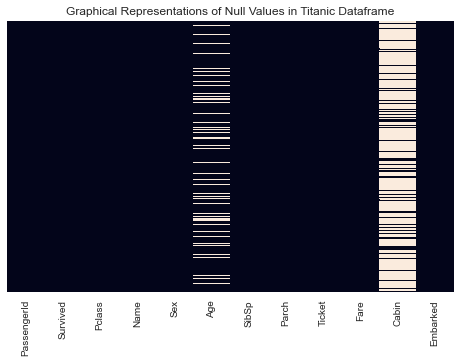

In [528]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)   # Visualization of missing data
plt.title('Graphical Representations of Null Values in Titanic Dataframe')

### Embarked

Let's take the column, Embarked first to populate the missing values.

In [529]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


These two instances are for two ladies, who travelled in "Class 1", together on the same ticket and even shared the Cabin (B28).

In [530]:
# Shows the no. of first class passengers by Embarked
titanic[(titanic['Pclass']==1)].groupby('Embarked')['Pclass'].count()

Embarked
C     85
Q      2
S    127
Name: Pclass, dtype: int64

As they were travelling in "Class 1", we can use "groupby" statement to get the port from where most "Class 1" travellers boarded.

### Data Visualization

Text(0.5, 1.0, 'Number of Passengers by of first class by Emabarked')

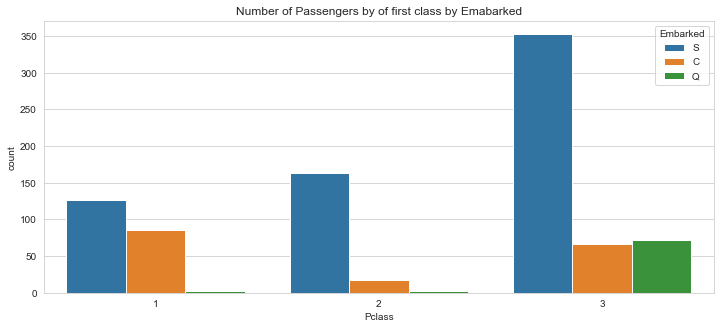

In [531]:
plt.figure(figsize=(12,5))
sns.countplot(data=titanic, x='Pclass', hue='Embarked')
plt.title('Number of Passengers by of first class by Emabarked')

In [532]:
titanic['Embarked'].fillna('S',inplace=True)

 This will give us the number of missing values within "Embarked" column

In [533]:
titanic[(titanic['PassengerId'] == 62) | (titanic['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


Now that all missing values in Embarked column have been populated, let's analyse it in detail.

Text(0.5, 1.0, 'Survival vs. Embarked')

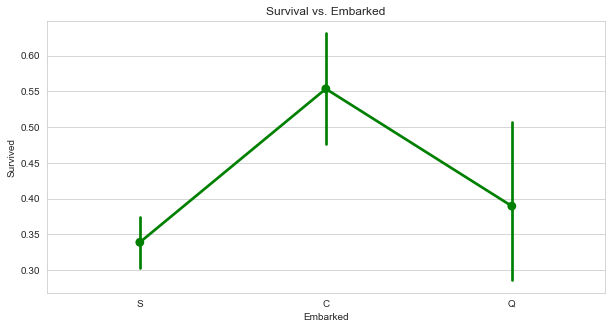

In [534]:
plt.figure(figsize=(10,5))
sns.pointplot(x='Embarked', y='Survived',data=titanic, color='g')
plt.title('Survival vs. Embarked')

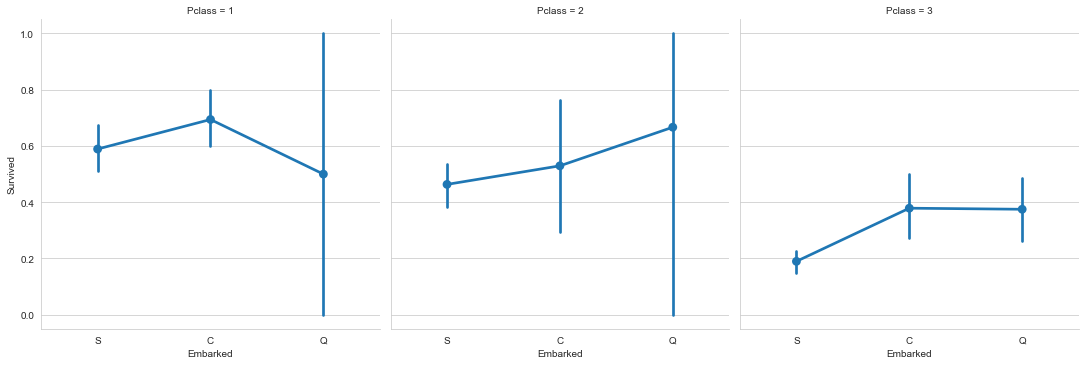

In [535]:
sns.factorplot('Embarked','Survived', col='Pclass',data=titanic)

Text(0.5, 1.0, 'Survival vs. Embarked based on Gender')

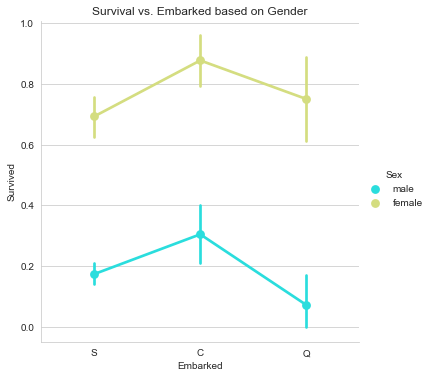

In [536]:
sns.factorplot('Embarked','Survived', hue='Sex', data=titanic, palette='rainbow')
plt.title('Survival vs. Embarked based on Gender')

### Age
 Age column has 177 missing values. But before we populate the missing values, let's first draw a histogram of Age with null values. 

#### Age Distribution Graph based on Mean age, Median Age and then predict the overall Average age

Text(0.5, 1.0, 'Age Distribution')

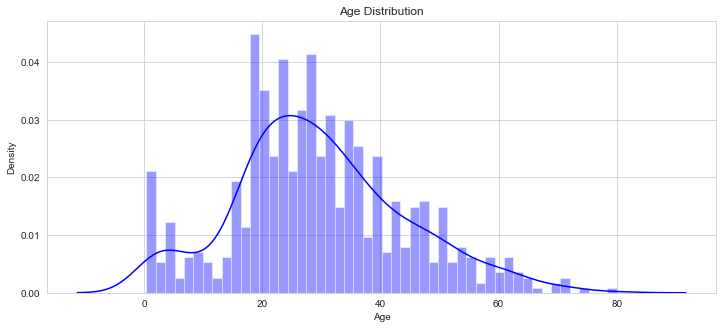

In [537]:
plt.figure(figsize=(12,5))
sns.distplot(titanic['Age'].dropna(),bins=50,color='blue',kde=True)
plt.title('Age Distribution')

The graphs shows that most of the passengers were between 18 and 40 years old.

In [538]:
print ("Mean Age:   ", titanic.Age.dropna().mean(), "years")   
print ("Median Age: ", titanic.Age.dropna().median(), "years")

Mean Age:    29.69911764705882 years
Median Age:  28.0 years


We can improve these averages based on passengers' class of travel (Pclass) and gender (Sex) and a combination of both.

In [539]:
print("Class 1, Overall average age: ",(titanic[titanic['Pclass']==1])['Age'].mean())
print("Class 2, Overall average age: ",(titanic[titanic['Pclass']==2])['Age'].mean())
print("Class 3, Overall average age: ",(titanic[titanic['Pclass']==3])['Age'].mean())

Class 1, Overall average age:  38.233440860215055
Class 2, Overall average age:  29.87763005780347
Class 3, Overall average age:  25.14061971830986


#### Average Age per Class based on Gender

In [540]:
print("Class 1, Male average age  : ",(titanic[(titanic['Pclass']==1) & (titanic['Sex']== 'male')])['Age'].mean())
print("Class 1, Female average age: ",(titanic[(titanic['Pclass']==1) & (titanic['Sex']== 'female')])['Age'].mean())
print("Class 2, Male average age  : ",(titanic[(titanic['Pclass']==2) & (titanic['Sex']== 'male')])['Age'].mean())
print("Class 2, Female average age: ",(titanic[(titanic['Pclass']==2) & (titanic['Sex']== 'female')])['Age'].mean())
print("Class 3, Male average age  : ",(titanic[(titanic['Pclass']==3) & (titanic['Sex']== 'male')])['Age'].mean())
print("Class 3, Female average age: ",(titanic[(titanic['Pclass']==3) & (titanic['Sex']== 'female')])['Age'].mean())

Class 1, Male average age  :  41.28138613861386
Class 1, Female average age:  34.61176470588235
Class 2, Male average age  :  30.74070707070707
Class 2, Female average age:  28.722972972972972
Class 3, Male average age  :  26.507588932806325
Class 3, Female average age:  21.75


### Name- 
We can use Regex(Regular Expressions) on "Name" column to create a new feature/column "Title".

In [541]:
titanic['Title'] = titanic.Name.str.extract('([A-Za-z]+)\.',expand=True)

Let's reconfirm this by running a 'value_counts' statement on "Title" to check all possible values that we have.

In [542]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Countess      1
Don           1
Jonkheer      1
Ms            1
Sir           1
Mme           1
Capt          1
Name: Title, dtype: int64

As adult females a well as girl child will have the same title "Miss", "Ms.", "the Countess", "Mme","Mlle", its obvious that Title alone cannot be used to determine female child.
Therefore, we rely only on title is "Master" to use to determine a Child or adult.

In [543]:
pd.crosstab(titanic['Title'],titanic['Sex'],margins=True)

Sex,female,male,All
Title,,,
Capt,0,1,1
Col,0,2,2
Countess,1,0,1
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Master,0,40,40


 Replacing titles to reduce overall times to Child, Mr, Mrs, Miss, and Other

In [544]:
titanic['Title'].replace(['Master','Ms','Mlle','Mme','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],\
            ['Child','Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Rechecking whether the changes are made correctly

In [545]:
titanic.Title.value_counts()

Mr       529
Miss     186
Mrs      127
Child     40
Other      9
Name: Title, dtype: int64

Now we will calculate passengers' mean age based on the new feature Title.

In [546]:
titanic.groupby('Title')['Age'].mean()

Title
Child     4.574167
Miss     21.860000
Mr       32.739609
Mrs      35.981818
Other    45.888889
Name: Age, dtype: float64

 let's recalculate the mean age based on "Title" and "Pclass"

Let's round the above mentioned values to the nearest whole number before imputing into missing/null values of Age column

In [547]:
round(titanic.groupby(['Title',  'Pclass'])['Age'].mean())

Title  Pclass
Child  1          5.0
       2          2.0
       3          5.0
Miss   1         30.0
       2         23.0
       3         16.0
Mr     1         42.0
       2         33.0
       3         29.0
Mrs    1         41.0
       2         34.0
       3         34.0
Other  1         51.0
       2         43.0
Name: Age, dtype: float64

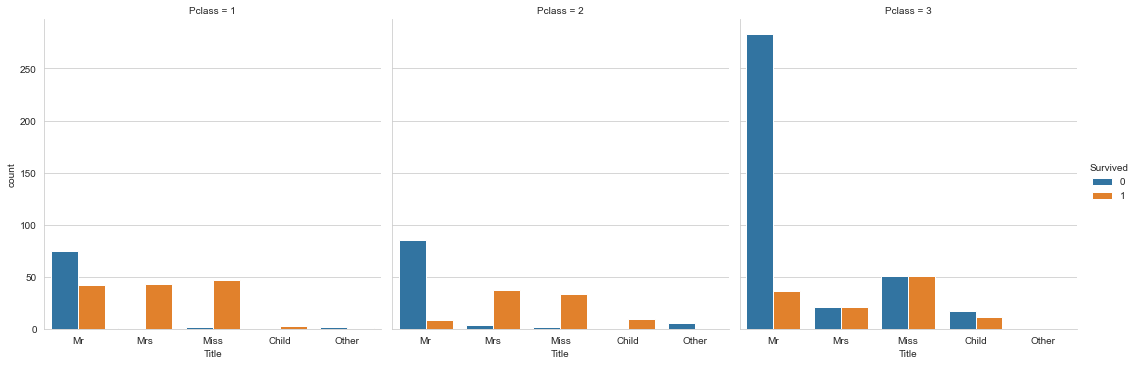

In [548]:
sns.factorplot(data=titanic, x='Title', col = 'Pclass',kind='count',hue='Survived')

#### Define Age Fixing Function

In [549]:
def age_fix(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    Title = cols[2]
    
    if pd.isnull(Age):
        
        if Pclass == 1 and Title == 'Child':
            return 5
        elif Pclass == 2 and Title == 'Child':
            return 2
        elif Pclass == 3 and Title == 'Child':
            return 5
        
        elif Pclass == 1 and Title == 'Miss':
            return 30
        elif Pclass == 2 and Title == 'Miss':
            return 23
        elif Pclass == 3 and Title == 'Miss':
            return 16
        
        elif Pclass == 1 and Title == 'Mr':
            return 42
        elif Pclass == 2 and Title == 'Mr':
            return 33
        elif Pclass == 3 and Title == 'Mr':
             return 29
        
        elif Pclass == 1 and Title == 'Mrs':
            return 41
        elif Pclass == 2 and Title == 'Mrs':
            return 34
        elif Pclass == 3 and Title == 'Mrs':
            return 34
        
        elif Pclass == 1 and Title == 'Other':
            return 51
        elif Pclass == 2 and Title == 'Other':
            return 43
              
        else:
            return Age
    else:
        return Age

let's use the age_fix function to impute missing values in Age column

In [550]:
titanic['Age'] = titanic[['Age','Pclass','Title']].apply(age_fix,axis=1)

Let's reconfirm that there are no more missing / null values in Age column.

In [551]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

#### Drawing Some Tables and Graphs Related to Age Feature

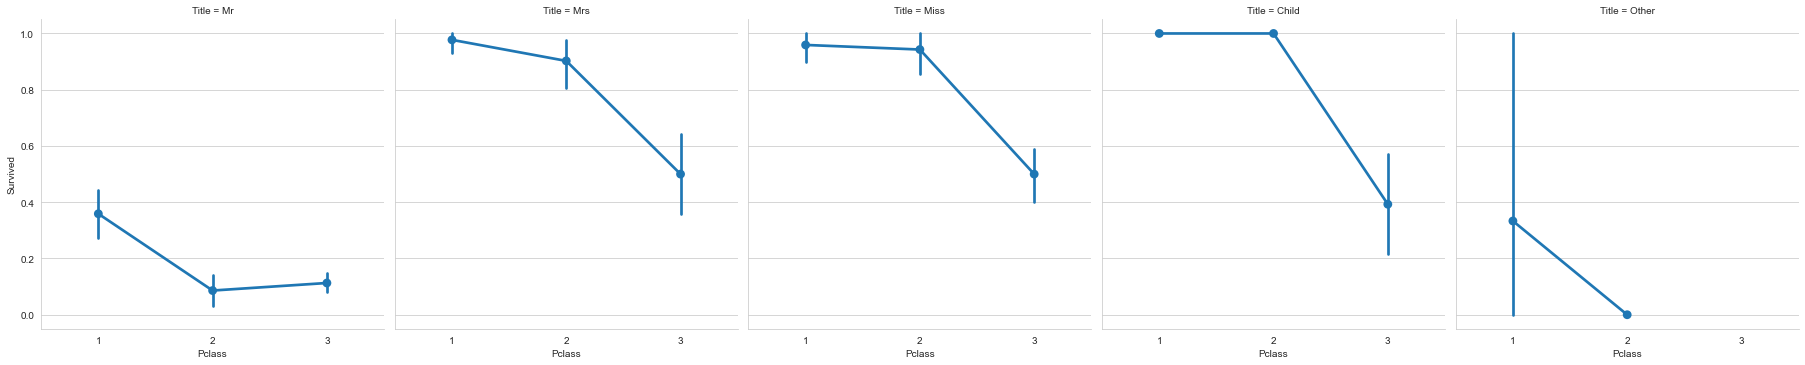

In [552]:
sns.factorplot(x='Pclass',y='Survived',col='Title',data=titanic)

Let's start by getting the describive stats and drawing some tables and graphs.

In [553]:
titanic['Age'].describe(include=all)

count    891.000000
mean      29.463715
std       13.559607
min        0.420000
25%       21.000000
50%       29.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

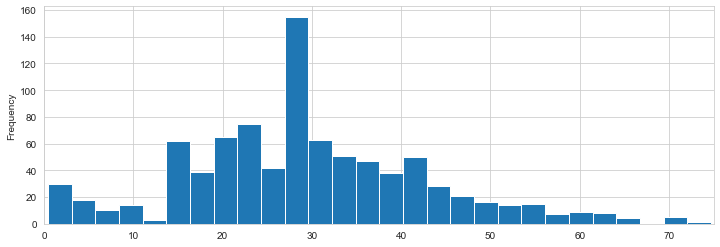

In [554]:
titanic['Age'].plot(kind='hist',bins=30,xlim=(0,75),figsize=(12,4))

#### Let's create a new feature 'AgeBins' which will have 5 equal numbers of passengers based on their Age.

In [555]:
titanic['AgeBins'] = 0 

# Divides data into five equal bins
titanic['AgeBins']=pd.qcut(titanic['Age'],5)

# Confirms the values in each bin
titanic.groupby('AgeBins')['AgeBins'].count()

AgeBins
(0.419, 19.0]    201
(19.0, 26.0]     157
(26.0, 30.0]     181
(30.0, 40.5]     175
(40.5, 80.0]     177
Name: AgeBins, dtype: int64

In [556]:
pd.crosstab(titanic['AgeBins'],titanic['Survived'],margins=True)

Survived,0,1,All
AgeBins,,,
"(0.419, 19.0]",101,100,201
"(19.0, 26.0]",104,53,157
"(26.0, 30.0]",137,44,181
"(30.0, 40.5]",98,77,175
"(40.5, 80.0]",109,68,177
All,549,342,891


#### Graphical Representation Survival Vs AgeBins

Text(0.5, 1.0, 'Survival vs. Age Bins')

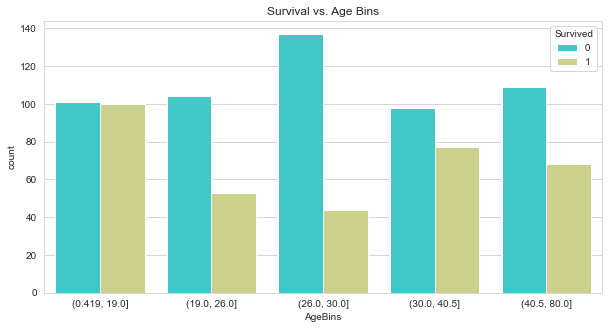

In [557]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeBins',hue='Survived',data=titanic,palette='rainbow') 
plt.title('Survival vs. Age Bins')

#### Graphical Representation of AgeBins Vs Gender

Text(0.5, 1.0, 'Age Bins vs. Gender')

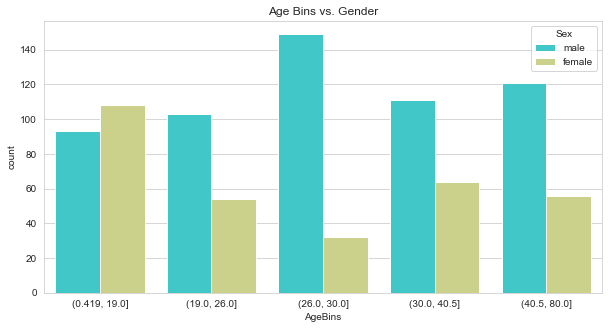

In [558]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeBins',hue='Sex',data=titanic,palette='rainbow')   # AgeBins vs. Gender (Sex)
plt.title('Age Bins vs. Gender')

#### Strip plot of Age vs. Pclass

Text(0.5, 1.0, 'Age vs. Class')

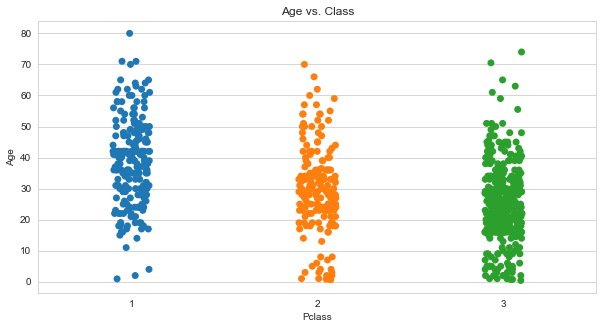

In [559]:
plt.figure(figsize=(10,5))
sns.stripplot(data=titanic, x='Pclass', y= 'Age',size=7)       
plt.title('Age vs. Class')

#### Predicting No. of Child Passengers

In [560]:
titanic[(titanic['Age'] <= 16) & (titanic['Title'] == 'Mrs')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBins
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,"(0.419, 19.0]"
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,Mrs,"(0.419, 19.0]"


The reason for exclusion based on title "Mrs" is because there were two female passengers aged 14 and 15 and their titles were 'Mrs' (as shown above).

In [561]:
titanic[(titanic['Age'] <= 16) & (titanic['Title'] !='Mrs')]['Age'].count() # Count of Child Passengers

135

Total no. of Child Passengers is 135

In [562]:
titanic['Child'] = 0                      # Creates a new feature "Child" and assigns initial value '0'
titanic.loc[(titanic['Age'] <= 16) & (titanic['Title'] !='Mrs'),'Child'] = 1 
# Assigns value '1' to all Children based on the above-mentioned criteria
titanic.Child.value_counts()
# Reconfirms that values have been successfully put
pd.crosstab(titanic['Child'],titanic['Survived'],margins=True) 

Survived,0,1,All
Child,,,
0,488,268,756
1,61,74,135
All,549,342,891


#### Children survived Vs Died

Text(0.5, 1.0, 'Children Survival')

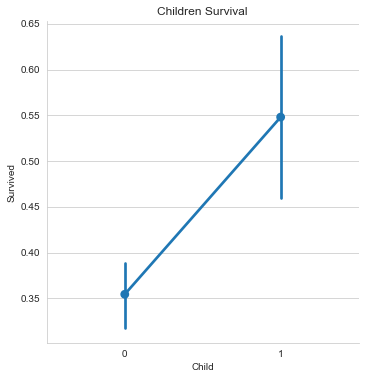

In [563]:
sns.factorplot('Child','Survived',data=titanic)       
plt.title('Children Survival')

### Cabin 
 The Cabin column has significantly large number of missing values, i.e. 687

Let's create a new column "Deck" using the first character of Cabin Number.Let's check first few rows in the titanic dataset to see how the new feature looks like. Please note that the "NaN' values will appear with a small "n".

In [564]:
titanic['Deck'] = titanic['Cabin'].astype(str).str[0]
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBins,Child,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(19.0, 26.0]",0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30.0, 40.5]",0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(19.0, 26.0]",0,n


#### Count the value in the Deck Column

In [565]:
titanic.Deck.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [566]:
pd.crosstab(titanic['Deck'],titanic['Survived'],margins=True)

Survived,0,1,All
Deck,,,
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
T,1,0,1
n,481,206,687


#### Create a new feature "IsCabin" to indicate whether or not the cabin is available.

In [567]:
titanic['IsCabin'] = 1
titanic.loc[titanic['Cabin'].isnull(),'IsCabin'] = 0
titanic['IsCabin'].value_counts() 

0    687
1    204
Name: IsCabin, dtype: int64

#### IsCabin Vs Survived

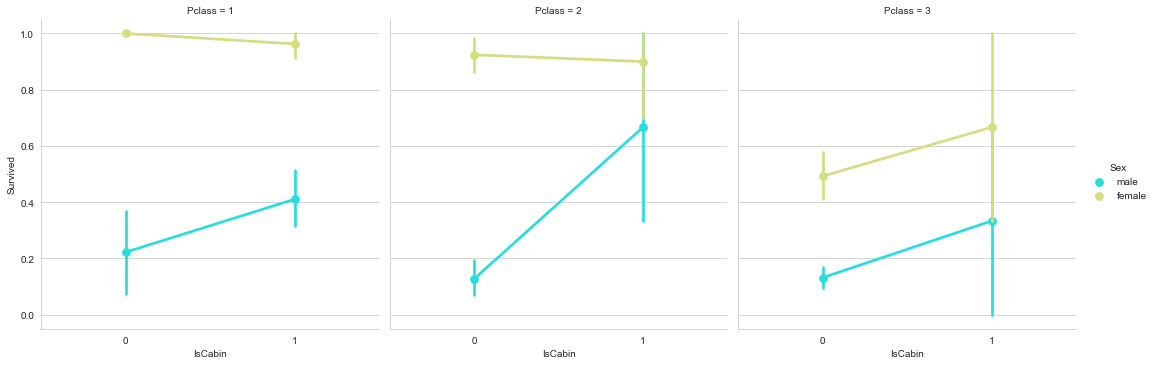

In [568]:
sns.factorplot(x='IsCabin',y='Survived',col='Pclass',hue='Sex',data=titanic, palette='rainbow')

#### PClass impact on survival Chances

Let's first count the passengers travelled in each class and the number of passengers survived and died per class of travel.

In [569]:
pd.crosstab(titanic['Pclass'],titanic['Survived'],margins=True,)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### Percentage of passengers travelled per class of travel

Text(0.5, 1.0, 'Passengers per Class of Travel (%age)')

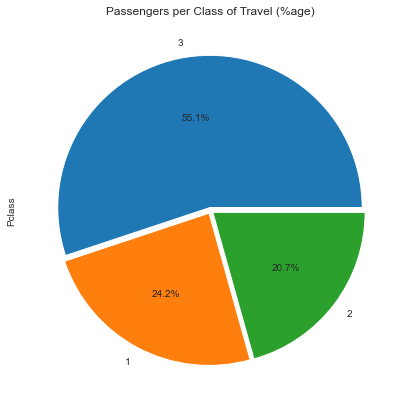

In [570]:
titanic['Pclass'].value_counts().plot.pie(explode=[0.02,0.02,0.02],autopct='%1.1f%%',figsize=(7,7))
plt.title('Passengers per Class of Travel (%age)')

#### Survived vs. Died per class of travel

Text(0.5, 1.0, 'Survival vs. Class of Travel')

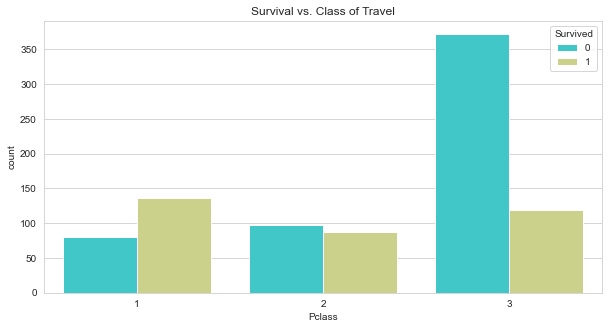

In [571]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass',hue='Survived',data=titanic,palette='rainbow')    
plt.title('Survival vs. Class of Travel')

<Figure size 576x360 with 0 Axes>

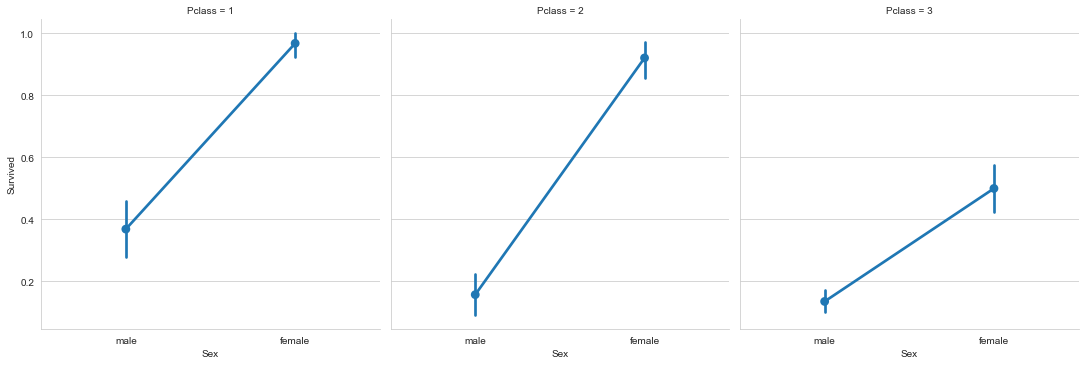

In [572]:
plt.figure(figsize=(8,5))
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=titanic)

#### SibSp- This feature shows the number of siblings travelled together

Let's plot some graphs and analyse the data to determine it's impact on passengers' survival.

In [573]:
pd.crosstab(titanic['SibSp'],titanic['Survived'],margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


####  Graphical representation of passengers survived vs. die based on Siblings and Spouses  

[Text(0.5, 1.0, 'Siblings & Spouses Survival')]

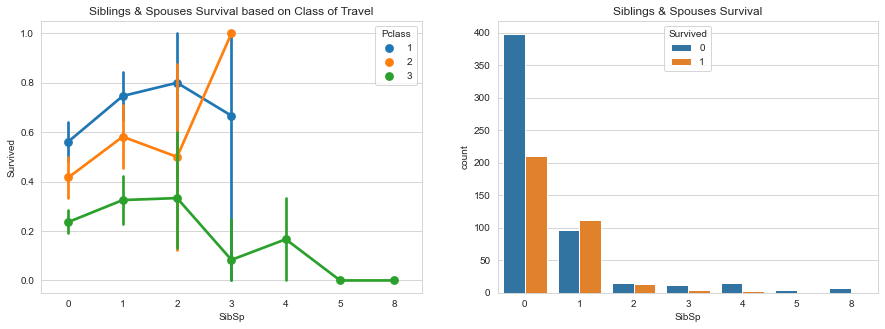

In [574]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.pointplot('SibSp','Survived',hue='Pclass',data=titanic,ax=ax1)
ax1.set(title='Siblings & Spouses Survival based on Class of Travel')
sns.countplot(x='SibSp',data=titanic,hue='Survived',ax=ax2) 
ax2.set(title='Siblings & Spouses Survival')

In [575]:
pd.crosstab(titanic['SibSp'],titanic['Pclass'])

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Titanic passengers' data showed a strange pattern. 68% passengers were travelling alone, out of which only 35% survived! There is 54% survival rate of passengers with only one sibling or spouse followed for 46% survival rate for passengers with three siblings / spouse. From that point onwards, the survival rate diminishes as the SibSp number increases.

#### Parch- This feature shows the number of parents and children travelled together.

Let's plot some graphs and analyse the data to determine it's impact on passengers' survival.

In [576]:
pd.crosstab(titanic['Parch'],titanic['Survived'],margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


####  Graphical representation of passengers survived vs. die based on Siblings and Parch  

[Text(0.5, 1.0, 'Parents & Children Survival')]

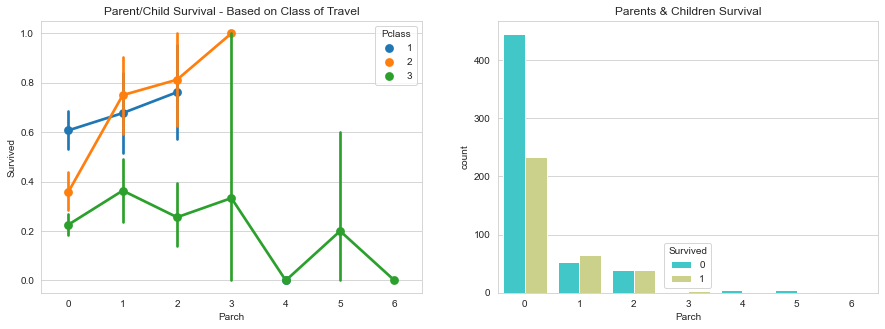

In [577]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.pointplot('Parch','Survived',hue='Pclass',data=titanic,ax=ax1)
ax1.set(title='Parent/Child Survival - Based on Class of Travel')
sns.countplot(x='Parch',data=titanic,hue='Survived',ax=ax2, palette='rainbow') 
ax2.set(title='Parents & Children Survival')

In [578]:
pd.crosstab(titanic['Parch'],titanic['Pclass'])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


#### FamSize (Family Size)

FamSize will have the combination of Parch and SibSp values.

Creating new feature "FamSize" by adding values in "SibSp" and "Parch"

In [579]:
titanic['FamSize'] = titanic['SibSp'] + titanic['Parch'] 

Let's reconfirm the changes have been done successfully by running the value_counts() statement.

In [580]:
titanic.FamSize.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamSize, dtype: int64

Survival vs. family size 

In [581]:
pd.crosstab(titanic['Survived'],titanic['FamSize'],margins=True)

FamSize,0,1,2,3,4,5,6,7,10,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


#### Alone 
Alone will have only two values:

'0' means not alone

'1' mean alone

In [582]:
titanic['Alone'] = 0
titanic.loc[titanic['FamSize']== 0,'Alone'] = 1 #Populate "Alone" with value '1' where family size is '0' 

# Let's reconfirm the changes have been done successfully by running the value_counts() statement.
titanic.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

Survival vs. Alone feature

In [583]:
pd.crosstab(titanic['Alone'],titanic['Survived'],margins=True) 

Survived,0,1,All
Alone,,,
0,175,179,354
1,374,163,537
All,549,342,891


#### Graphical Representation of Survival vs. Alone Based on Gender

[Text(0.5, 1.0, 'Survival vs. Alone Based on Gender')]

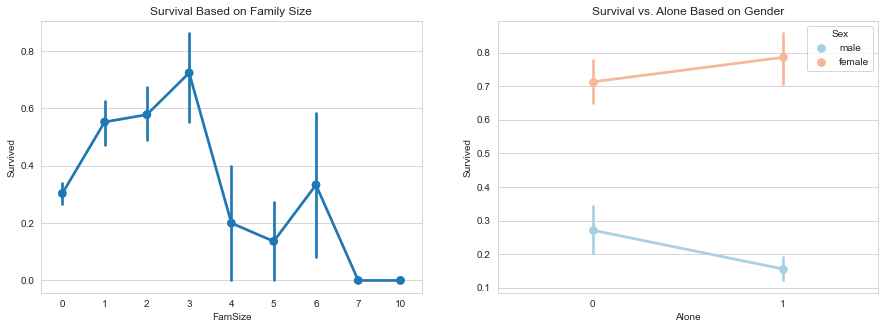

In [584]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.pointplot('FamSize','Survived',data=titanic,ax=ax1)
ax1.set(title='Survival Based on Family Size')
sns.pointplot('Alone','Survived',hue='Sex',data=titanic,palette='RdBu_r',ax=ax2)
ax2.set(title='Survival vs. Alone Based on Gender')

#### Sex
Overall, there were 35% females and 65% males onboard (based on 891 records)

Draw some tables and plot some graphs to see the relationship of Sex feature with other features.

In [585]:
pd.crosstab(titanic['Sex'],titanic['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### Graphical Representation based on Survival Based on Embarked & Gender

[Text(0.5, 1.0, 'Survival Based on Embarked & Gender')]

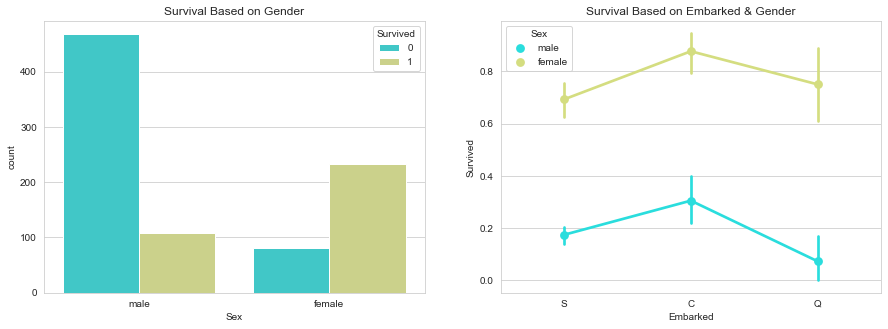

In [586]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Sex',data=titanic,hue='Survived',palette='rainbow',ax=ax1)
ax1.set(title='Survival Based on Gender')
sns.pointplot(x='Embarked',y='Survived',hue='Sex',data=titanic, palette='rainbow',ax=ax2)
ax2.set(title='Survival Based on Embarked & Gender')

#### Graphical Repesentation based on Survival rate based on Sex

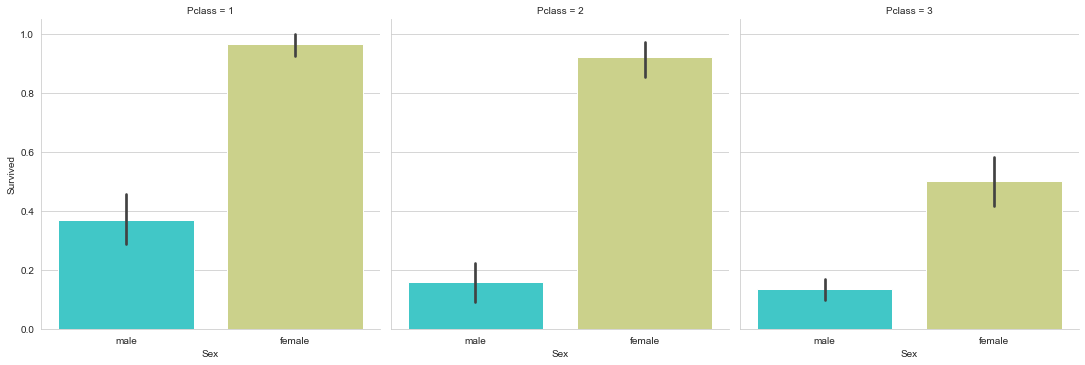

In [587]:
sns.factorplot('Sex','Survived', col='Pclass',data=titanic,kind='bar',palette='rainbow') 

#### Fare
As it's obvious that higher class passengers had paid highest fare and because Class-1 passengers had highest survival rate, followed by Class-2, we can easily deduced that Fare has significant impact on determining chances of survival.

In [588]:
titanic['Fare'].describe(include=all)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The highest fare paid by passenger was '512.32' and lowest fare was zero.

In [589]:
titanic[titanic['Fare'] >= 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBins,Child,Deck,IsCabin,FamSize,Alone
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,"(30.0, 40.5]",0,n,0,0,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,"(30.0, 40.5]",0,B,1,1,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,"(30.0, 40.5]",0,B,1,0,1


#### Let' draw distribution charts for 'Fare' to see the dispersion across the dataset

Text(0.5, 1.0, 'Fare Distrubution')

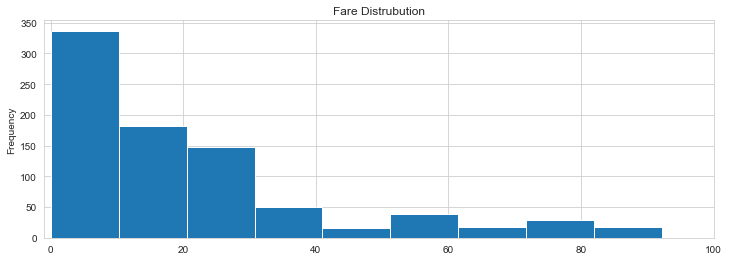

In [590]:
titanic['Fare'].plot(kind='hist',bins=50,xlim=(-1,100),figsize=(12,4))
plt.title('Fare Distrubution')

#### Ticket
Ticket feature contains the ticket number of passengers. In some cases, it's a mix of strings and numbers whrease in most of the cases only numbers are given.

Let's analyse it in detail to determine whether or not it has any impact on passengers' survival.

In [591]:
titanic['Ticket'].value_counts().head(20)

347082          7
CA. 2343        7
1601            7
CA 2144         6
3101295         6
347088          6
S.O.C. 14879    5
382652          5
4133            4
PC 17757        4
113760          4
2666            4
113781          4
LINE            4
W./C. 6608      4
349909          4
19950           4
17421           4
347077          4
24160           3
Name: Ticket, dtype: int64

'0' means Individual Passenger / ticket not shared

'1' means Shared Ticket (used by a group of passengers)

In [592]:
titanic['SharedTicket']= 0 
ticketV = titanic['Ticket'].value_counts() #Calculates passengers groups on each tickets and assign it to a variable 'ticketV'
ticketV.head(2)

347082      7
CA. 2343    7
Name: Ticket, dtype: int64

In [593]:
# Creates a list of tickets used by individual(single) passengers
single = ticketV.loc[ticketV ==1].index.tolist()

# Creates a list of tickets shared by group of passengers
multi  = ticketV.loc[ticketV > 1].index.tolist() 

print("Number of Individual Tickets: ", len(multi))     
print("Number of Shared Tickets    : ", len(single))   

Number of Individual Tickets:  134
Number of Shared Tickets    :  547


In [594]:
for ticket in multi:
    titanic.loc[titanic['Ticket'] == ticket, 'SharedTicket'] = 1

In [595]:
   titanic['SharedTicket'].value_counts()

0    547
1    344
Name: SharedTicket, dtype: int64

In [596]:
pd.crosstab(titanic['SharedTicket'],titanic['Survived'],margins=True)

Survived,0,1,All
SharedTicket,,,
0,384,163,547
1,165,179,344
All,549,342,891


#### Graphical Representation on Survival Based on Shared Ticket & Gender

[Text(0.5, 1.0, 'Survival Based on Shared Ticket & Gender')]

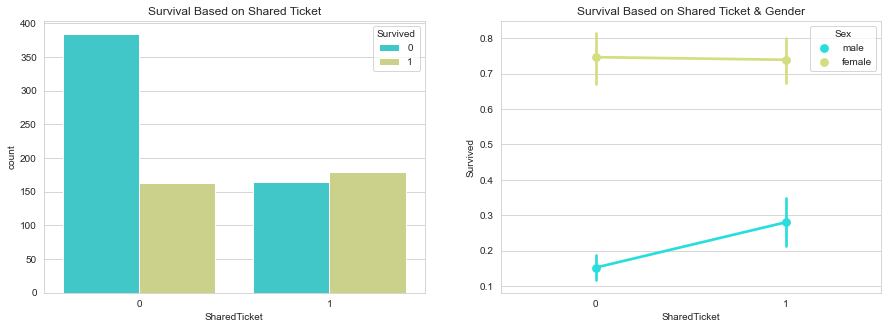

In [597]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='SharedTicket',data=titanic,hue='Survived',palette='rainbow',ax=ax1)
ax1.set(title='Survival Based on Shared Ticket')
sns.pointplot(x='SharedTicket',y='Survived',hue='Sex',data=titanic, palette='rainbow',ax=ax2)
ax2.set(title='Survival Based on Shared Ticket & Gender')

In [598]:
pd.crosstab(titanic['SharedTicket'],titanic['Pclass'],margins=True)

Pclass,1,2,3,All
SharedTicket,,,,
0,97,107,343,547
1,119,77,148,344
All,216,184,491,891


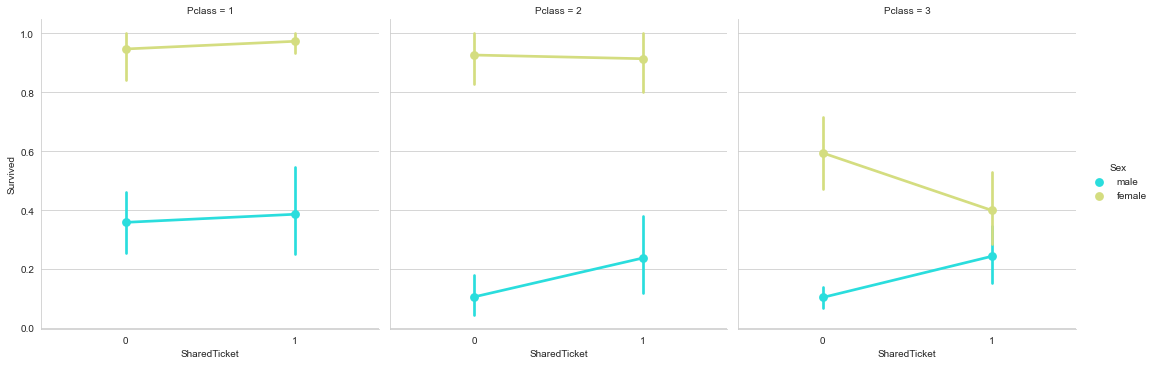

In [599]:
# Survival based on SharedTicket vs. Pclass taking into account the gender (Sex)
sns.factorplot('SharedTicket','Survived', col='Pclass',hue='Sex',data=titanic, palette='rainbow')

### Data Cleaning

In [600]:
titanic.shape

(891, 20)

In [601]:
titanic.info()  # Overview of dataset features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  Title         891 non-null    object  
 13  AgeBins       891 non-null    category
 14  Child         891 non-null    int64   
 15  Deck          891 non-null    object  
 16  IsCabin       891 non-null    int64   
 17  FamSize       891 non-null    int64   
 18  Alone     

In [602]:
titanic.head()  # First five rows of titanic dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBins,Child,Deck,IsCabin,FamSize,Alone,SharedTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(19.0, 26.0]",0,n,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30.0, 40.5]",0,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(19.0, 26.0]",0,n,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30.0, 40.5]",0,C,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30.0, 40.5]",0,n,0,0,1,0


### Creation of Dummy Variables

In [603]:
#Let's first create Dummy Variable for "Embarked" and "Sex" features.
int1 = titanic.copy()

In [604]:
int1.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Title             0
AgeBins           0
Child             0
Deck              0
IsCabin           0
FamSize           0
Alone             0
SharedTicket      0
dtype: int64

In [605]:
emb  = pd.get_dummies(titanic['Embarked'],drop_first=True) 
nsex = pd.get_dummies(titanic['Sex'],drop_first=True)     

Now, lets Concatenate the newly created Dummy Variables with titanic dataframe

In [606]:
titanic = pd.concat([titanic,emb],axis=1)  
titanic = pd.concat([titanic,nsex],axis=1)

Let's check the shape of the titanic dataset after creating dummy variables, which shows that three new features have been added.

In [607]:
titanic.shape

(891, 23)

In [608]:
#Convertion to Numeric Values
#"Title" feature contains strings that cannot be used for machine learning. We need to convert it to numeric values.
titanic['Title'].replace(['Mr','Mrs','Miss','Child','Other'],[0,1,2,3,4],inplace=True)

In [609]:
titanic.drop(['PassengerId','Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','AgeBins','Deck'],inplace=True,axis=1)      

### Correlation
Correlation explains how one or more variables are related to each other

Heap Map:-
To use a heatmap the data should be in a matrix form. By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

Text(0.5, 1.0, 'Titanic Correlation Chart')

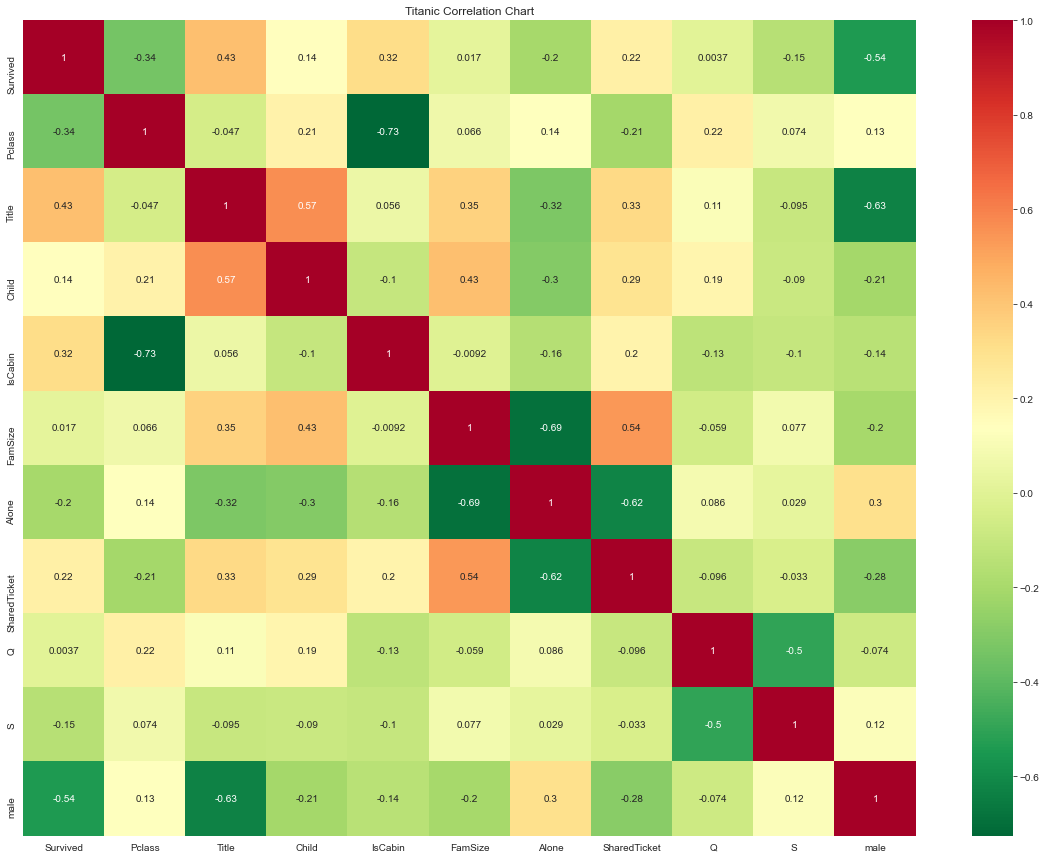

In [610]:
plt.figure(figsize=(20,15))
sns.heatmap(titanic.corr(),cmap='RdYlGn_r',annot=True)
plt.title('Titanic Correlation Chart')

### 7. Predictive Modelling / Machine Learning

Finally, our data is all set and we are eventually ready for Predictive Modelling / Machine Learning. We will use the following machine algorithms for Predictive Modelling:

1. Creation of Predictor & Target Variables
2. Data Split- Training & Test Data
3. Logistic Regression
4. Decision Tree Classifier
5. Random Forest Classifier
6. Support Vector Machine(rbf)
7. Support Vector Machine(Linear)
8. K-Nearest Neigbors Classifiers
9. Finding Best Score in Knn
10. Predictive Modelling Summary

In [611]:
titanic.shape

(891, 11)

In [612]:
titanic.head(2)

,Survived,Pclass,Title,Child,IsCabin,FamSize,Alone,SharedTicket,Q,S,male
0,0,3,0,0,0,1,0,0,0,1,1
1,1,1,1,0,1,1,0,0,0,0,0


### Creation of Predictor & Target Variables

In [613]:
#Let's now spilit the data into X (predictors) and y (target) variables.
y = titanic['Survived']                             
X = titanic.drop('Survived',inplace=False,axis=1)

In [614]:
X.head(2) 

,Pclass,Title,Child,IsCabin,FamSize,Alone,SharedTicket,Q,S,male
0,3,0,0,0,1,0,0,0,1,1
1,1,1,0,1,1,0,0,0,0,0


In [615]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

### Data Split - Training & Test Data

In [616]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [617]:
print ("'X_train', train data count : ", X_train.shape)
print ("'X_test', test data count   : ", X_test.shape)

'X_train', train data count :  (668, 10)
'X_test', test data count   :  (223, 10)


let's apply different machine learning algorithms to determine the accuracy of our predictions.

### Logistic Regression

In [618]:
# Importing of Logistic Regression Library from Scikit-Learn
lr = LogisticRegression()                                # Creation of Logistic Regression Model    
lr.fit(X_train,y_train)                                  # Model Training
lr_pred = lr.predict(X_test)                             # Prediction based on X_test

In [619]:
  # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,lr_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,lr_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,lr_pred))        # Classification Report 


Accuracy Score =  0.7937219730941704

Confusion Matrix: 
 [[112  20]
 [ 26  65]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       132
           1       0.76      0.71      0.74        91

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



### Decision Tree Classifier

### Model Creation, Training and Prediction

In [620]:
# Importing of Logistic Regression Library from Scikit-Learn
dt = DecisionTreeClassifier()                            # Creation of Decision Tree Classifier Model   
dt.fit(X_train,y_train)                                  # Model Training
dt_pred = dt.predict(X_test)                             # Prediction based on X_test

### Validation - Decision Tree

In [621]:
 # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,dt_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,dt_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,dt_pred))        # Classification Report 


Accuracy Score =  0.7713004484304933

Confusion Matrix: 
 [[117  15]
 [ 36  55]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       132
           1       0.79      0.60      0.68        91

    accuracy                           0.77       223
   macro avg       0.78      0.75      0.75       223
weighted avg       0.77      0.77      0.76       223



### Random Forest Classifier

### Model Creation, Training and Prediction

In [622]:
 # Importing of Logistic Regression Library from Scikit-Learn
rfc = RandomForestClassifier(n_estimators=100)           # Creation of Random Forest Classifier Model  
rfc.fit(X_train,y_train)                                 # Model Training
rfc_pred = rfc.predict(X_test)                           # Prediction based on X_test

### Validation - Random Forest

In [623]:
 # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,rfc_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,rfc_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,rfc_pred))        # Classification Report 


Accuracy Score =  0.7802690582959642

Confusion Matrix: 
 [[116  16]
 [ 33  58]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       132
           1       0.78      0.64      0.70        91

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



### Support Vector Machine(rbf)

### Model Creation, Training and Prediction

In [624]:
# Importing of Logistic Regression Library from Scikit-Learn
svr = SVC(kernel='rbf')                                  # Creation of Support Vector Machine (Radial) Model  
svr.fit(X_train,y_train)                                 # Model Training
svr_pred = svr.predict(X_test)                           # Prediction based on X_test

### Validate-SVM (Kernel = rbf)

In [625]:
 # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,svr_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,svr_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,svr_pred))        # Classification Report 


Accuracy Score =  0.8161434977578476

Confusion Matrix: 
 [[117  15]
 [ 26  65]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       132
           1       0.81      0.71      0.76        91

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



### Support Vector Machine - Linear

### Model Creation, Training and Prediction

In [626]:
# Importing of Logistic Regression Library from Scikit-Learn
sv = SVC(kernel='linear')                                # Creation of Support Vector Machine (Linear) Model  
sv.fit(X_train,y_train)                                  # Model Training
sv_pred = sv.predict(X_test)                             # Prediction based on X_test

### Validation - SVM Linear

In [627]:
# Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,sv_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,sv_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,sv_pred))        # Classification Report 


Accuracy Score =  0.7623318385650224

Confusion Matrix: 
 [[109  23]
 [ 30  61]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       132
           1       0.73      0.67      0.70        91

    accuracy                           0.76       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



### K-Nearest Neighbors Classifier

### Model Creation, Training and Prediction

In [628]:
# Importing of Logistic Regression Library from Scikit-Learn
knn = KNeighborsClassifier()                            # Creation of K-Nearest Neighbors Classifier Model 
knn.fit(X_train,y_train)                                # Model Training
knn_pred = knn.predict(X_test)                          # Prediction Based on X_train 

### Validation - KNN

In [629]:
 # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,knn_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,knn_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,knn_pred))        # Classification Report 


Accuracy Score =  0.7847533632286996

Confusion Matrix: 
 [[111  21]
 [ 27  64]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       132
           1       0.75      0.70      0.73        91

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



### Finding Best Score in KNN (based on number of neighbors)


The default K-value (neighbors) is 5. Now, let's apply a range of K-values (from 1 to 20) and see how this impacts the overall accuracy score.

Text(0, 0.5, 'Accuracy Score')

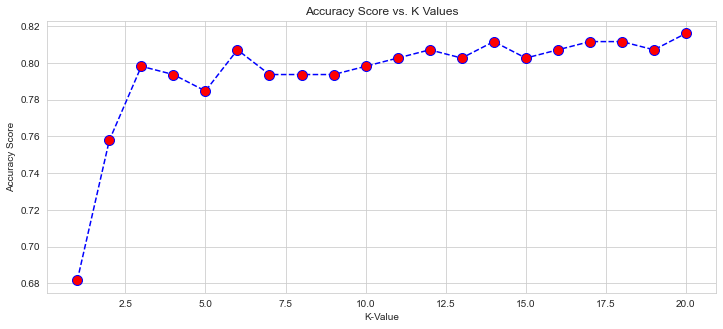

In [630]:
cnt = list(range(1,21))       # Range for the count of K-values
knn_score = []                # List to populate accurracy scores based on the K-value  

for i in cnt:                 # Loop to iterate through K-values, apply KNN Model and append the accuracy score to the list    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    kpred = knn.predict(X_test)
    score = accuracy_score(y_test,kpred)
    knn_score.append(score)

# Plotting the graph to dipict Accuracy Score vs. K-values

plt.figure(figsize=(12,5))
plt.plot(cnt,knn_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Values')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')

### Predictive Modelling Summary

Finally, we are done! Let's summarize the accuarcy values as been calculated above after applying different Machine Learning algorithms to determine the best algorithm / model for our Predictive Modelling.

{'Logistic Reg': 0.7937219730941704, 'DecisionTree': 0.7713004484304933, 'RandomForest': 0.7802690582959642, 'SVM-Linear': 0.7623318385650224, 'SVM-rbc': 0.8161434977578476, 'KNN': 0.7847533632286996}


Text(0, 0.5, 'Accuracy Scores')

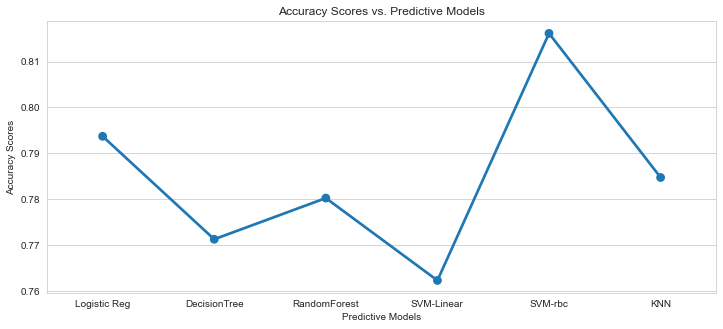

In [631]:
# Summarizing accuracy scores into a dictionery and plotting the graph
summary = {'Logistic Reg':accuracy_score(y_test,lr_pred),'DecisionTree':accuracy_score(y_test,dt_pred),\
           'RandomForest':accuracy_score(y_test,rfc_pred),'SVM-Linear':accuracy_score(y_test,sv_pred),\
           'SVM-rbc':accuracy_score(y_test,svr_pred),'KNN':accuracy_score(y_test,knn_pred)}
print(summary)
plt.figure(figsize=(12,5))
sns.pointplot(x=list(summary.keys()),y=list(summary.values()))
plt.title('Accuracy Scores vs. Predictive Models')
plt.xlabel('Predictive Models')
plt.ylabel('Accuracy Scores')

## Final Predictions

In [632]:
# Creating trainX and trainY datasets using full titanic dataset
trainX = titanic.drop('Survived',axis=1)
trainY = titanic['Survived']

In [633]:
trainX.head(2)     

,Pclass,Title,Child,IsCabin,FamSize,Alone,SharedTicket,Q,S,male
0,3,0,0,0,1,0,0,0,1,1
1,1,1,0,1,1,0,0,0,0,0


In [634]:
trainY.head(2)

0    0
1    1
Name: Survived, dtype: int64

### Save the Model

In [651]:
import joblib
filename = 'inhouse_Titanic-unshinkable_ship.pkl'  # save the model after predictions
joblib.dump(predictions, open(filename, 'wb'))

In [650]:
loaded_model = joblib.load(open('inhouse_Titanic-unshinkable_ship.pkl','rb')) #load the model after predictions